<a href="https://colab.research.google.com/github/OmarLopez1803/OMAR-LOPEZ-OLIVARES1/blob/main/%22AF8_RNC%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


AF8_RNC
AUTORES:


*   OMAR LÓPEZ OLIVARES
*   CARLOS YAHIR BÓRQUEZ ZAZUETA


In [ ]:
# 1. Importar librerías
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [ ]:
# 2. Cargar datos
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# 3. Preprocesamiento
# Redimensionar imágenes a (28, 28, 1) y normalizar
train_data = train_data.reshape(-1, 28, 28, 1).astype("float32") / 255.0
test_data = test_data.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Convertir etiquetas a one-hot encoding
train_labels_cat = to_categorical(train_labels, 10)
test_labels_cat = to_categorical(test_labels, 10)


In [ ]:
# 4. Crear el modelo CNN
modelo = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Capa de salida con softmax
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 5. Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# 6. Entrenar el modelo
historial = modelo.fit(train_data, train_labels_cat, epochs=5, batch_size=32, verbose=1)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 30ms/step - accuracy: 0.9075 - loss: 0.3085
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9868 - loss: 0.0421
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9912 - loss: 0.0281
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 31ms/step - accuracy: 0.9942 - loss: 0.0192
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.9954 - loss: 0.0141


In [ ]:
# 7. Evaluar el modelo
test_loss, test_accuracy = modelo.evaluate(test_data, test_labels_cat, verbose=0)
print(f"\nExactitud del modelo CNN en datos de prueba: {test_accuracy * 100:.2f}%")


Exactitud del modelo CNN en datos de prueba: 99.09%



Ejemplos de predicciones:
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


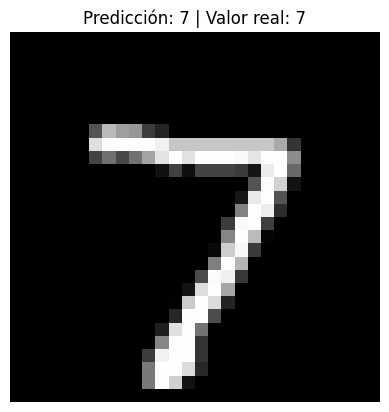

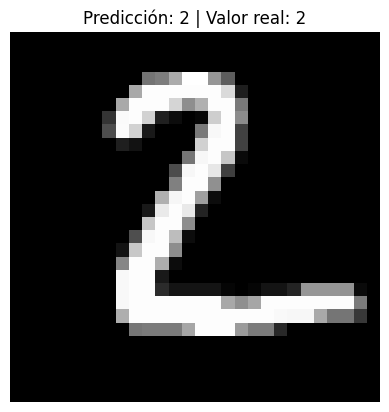

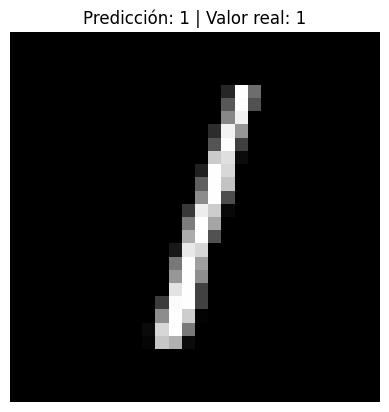

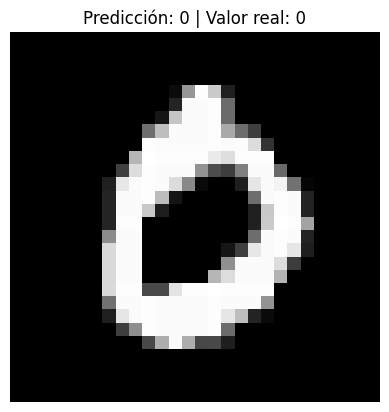

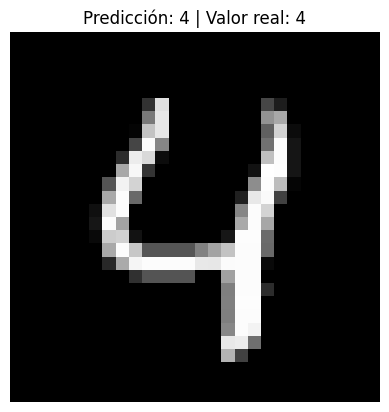

In [ ]:
# 8. Predicciones
print("\nEjemplos de predicciones:")
predicciones = modelo.predict(test_data)

for i in range(5):
    imagen = test_data[i].reshape(28, 28)
    predicha = np.argmax(predicciones[i])
    real = test_labels[i]

    plt.imshow(imagen, cmap='gray')
    plt.title(f"Predicción: {predicha} | Valor real: {real}")
    plt.axis('off')
    plt.show()